
# Valorant Pro Players Settings Analysis

This notebook provides an analysis of the settings used by professional Valorant players. The dataset includes information about the players' teams, their mouse settings (DPI, sensitivity, etc.), and the peripherals they use.

## Table of Contents
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
    - Distribution of DPI Settings
    - Correlation Heatmap
    - DPI vs. Sensitivity Scatter Plot
    - Distribution of Sensitivity Settings
    - Heatmap of Common Mouse and Keyboard Combinations
    - Boxplot of DPI by Team
    - Count Plot of Monitors Used



## 1. Data Cleaning

In this section, we clean the dataset by handling missing values and ensuring the data types are correct.


In [1]:

import pandas as pd

# Load the data
file_path = '/content/valorant_pro_settings.csv'
df = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column as it is not needed
df = df.drop(columns=['Unnamed: 0'])

# Fill missing values for numerical columns with the mean
df['Hz'] = df['Hz'].fillna(df['Hz'].mean())
df['DPI'] = df['DPI'].fillna(df['DPI'].mean())
df['Sens'] = df['Sens'].fillna(df['Sens'].mean())
df['eDPI'] = df['eDPI'].fillna(df['eDPI'].mean())
df['Scoped Sens'] = df['Scoped Sens'].fillna(df['Scoped Sens'].mean())

# Fill missing values for categorical columns with 'Unknown'
df['Mouse'] = df['Mouse'].fillna('Unknown')
df['Monitor'] = df['Monitor'].fillna('Unknown')
df['Resolution'] = df['Resolution'].fillna('Unknown')
df['Mousepad'] = df['Mousepad'].fillna('Unknown')
df['Keyboard'] = df['Keyboard'].fillna('Unknown')
df['Headset'] = df['Headset'].fillna('Unknown')

# Ensure data types are correct
df['Hz'] = df['Hz'].astype(float)
df['DPI'] = df['DPI'].astype(float)
df['Sens'] = df['Sens'].astype(float)
df['eDPI'] = df['eDPI'].astype(float)
df['Scoped Sens'] = df['Scoped Sens'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         429 non-null    object 
 1   Player       429 non-null    object 
 2   Mouse        429 non-null    object 
 3   Hz           429 non-null    float64
 4   DPI          429 non-null    float64
 5   Sens         429 non-null    float64
 6   eDPI         429 non-null    float64
 7   Scoped Sens  429 non-null    float64
 8   Monitor      429 non-null    object 
 9   Resolution   429 non-null    object 
 10  Mousepad     429 non-null    object 
 11  Keyboard     429 non-null    object 
 12  Headset      429 non-null    object 
dtypes: float64(5), object(8)
memory usage: 43.7+ KB



## 2. Exploratory Data Analysis (EDA)

In this section, we perform exploratory data analysis (EDA) to gain insights into the dataset.

### 2.1 Distribution of DPI Settings

We start by visualizing the distribution of DPI settings among the players.


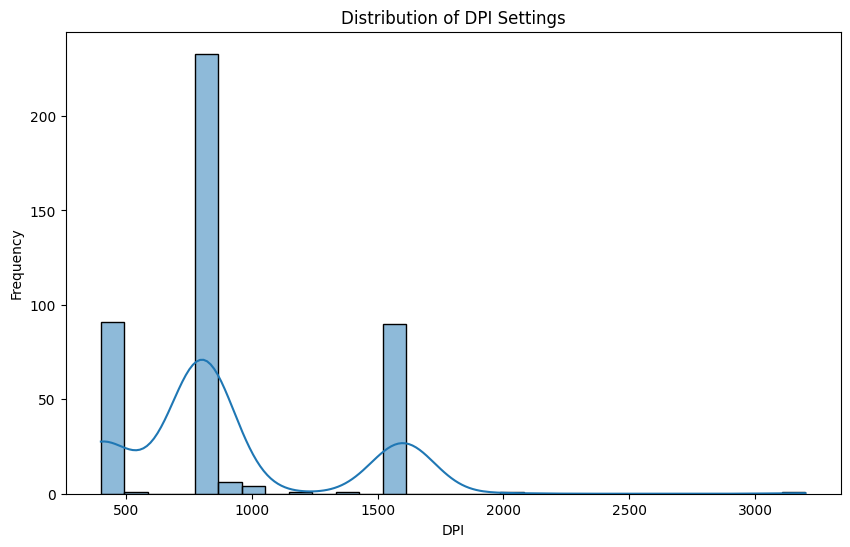

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of DPI Settings
plt.figure(figsize=(10, 6))
sns.histplot(df['DPI'], bins=30, kde=True)
plt.title('Distribution of DPI Settings')
plt.xlabel('DPI')
plt.ylabel('Frequency')
plt.show()



### 2.2 Correlation Heatmap

Next, we analyze the correlation between different numerical settings to identify any significant relationships.


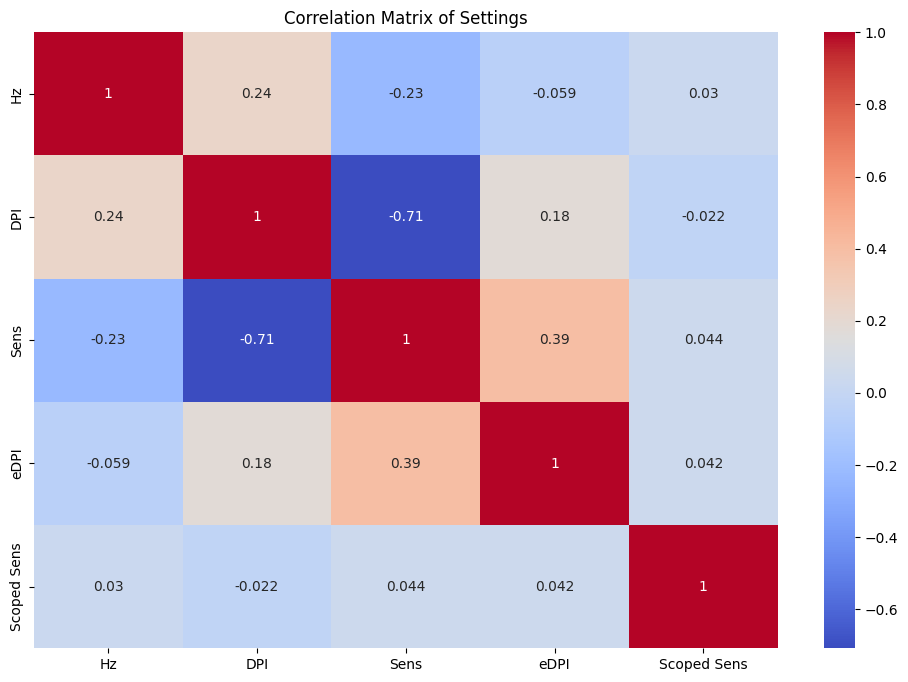

In [4]:

# Correlation Heatmap (only numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df[['Hz', 'DPI', 'Sens', 'eDPI', 'Scoped Sens']]
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Settings')
plt.show()



### 2.3 DPI vs. Sensitivity Scatter Plot

We plot DPI against sensitivity to observe any patterns or relationships.


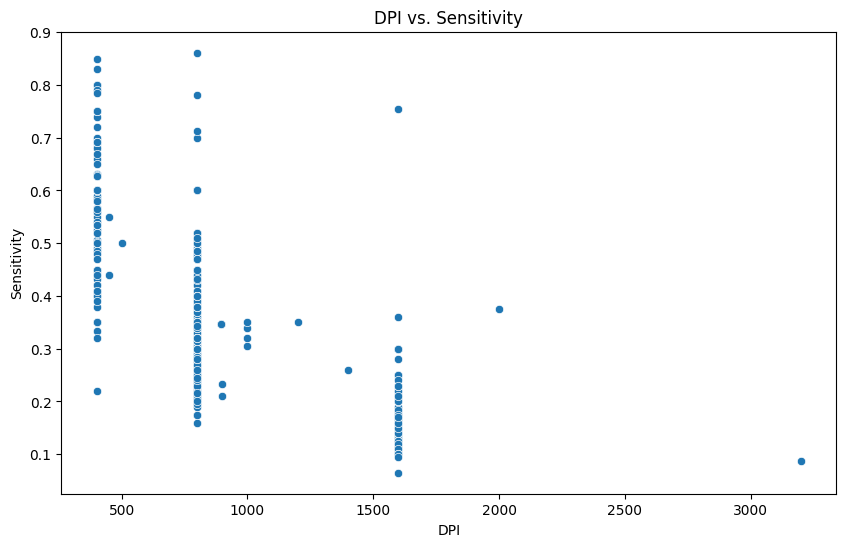

In [5]:

# Scatter Plot: DPI vs. Sensitivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DPI', y='Sens', data=df)
plt.title('DPI vs. Sensitivity')
plt.xlabel('DPI')
plt.ylabel('Sensitivity')
plt.show()



### 2.4 Distribution of Sensitivity Settings

We visualize the distribution of sensitivity settings among the players.


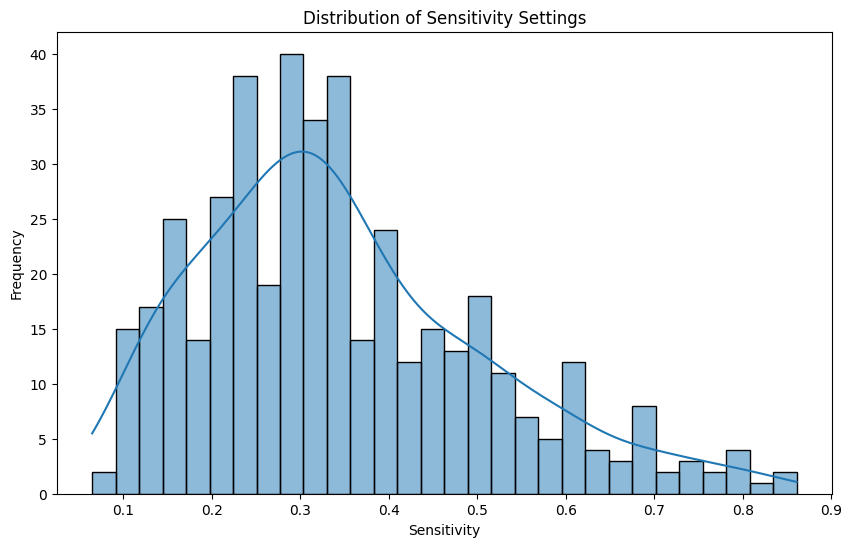

In [6]:

# Distribution of Sensitivity Settings
plt.figure(figsize=(10, 6))
sns.histplot(df['Sens'], bins=30, kde=True)
plt.title('Distribution of Sensitivity Settings')
plt.xlabel('Sensitivity')
plt.ylabel('Frequency')
plt.show()



### 2.5 Heatmap of Common Mouse and Keyboard Combinations

We create a heatmap to visualize the most common combinations of mouse and keyboard used by the players.


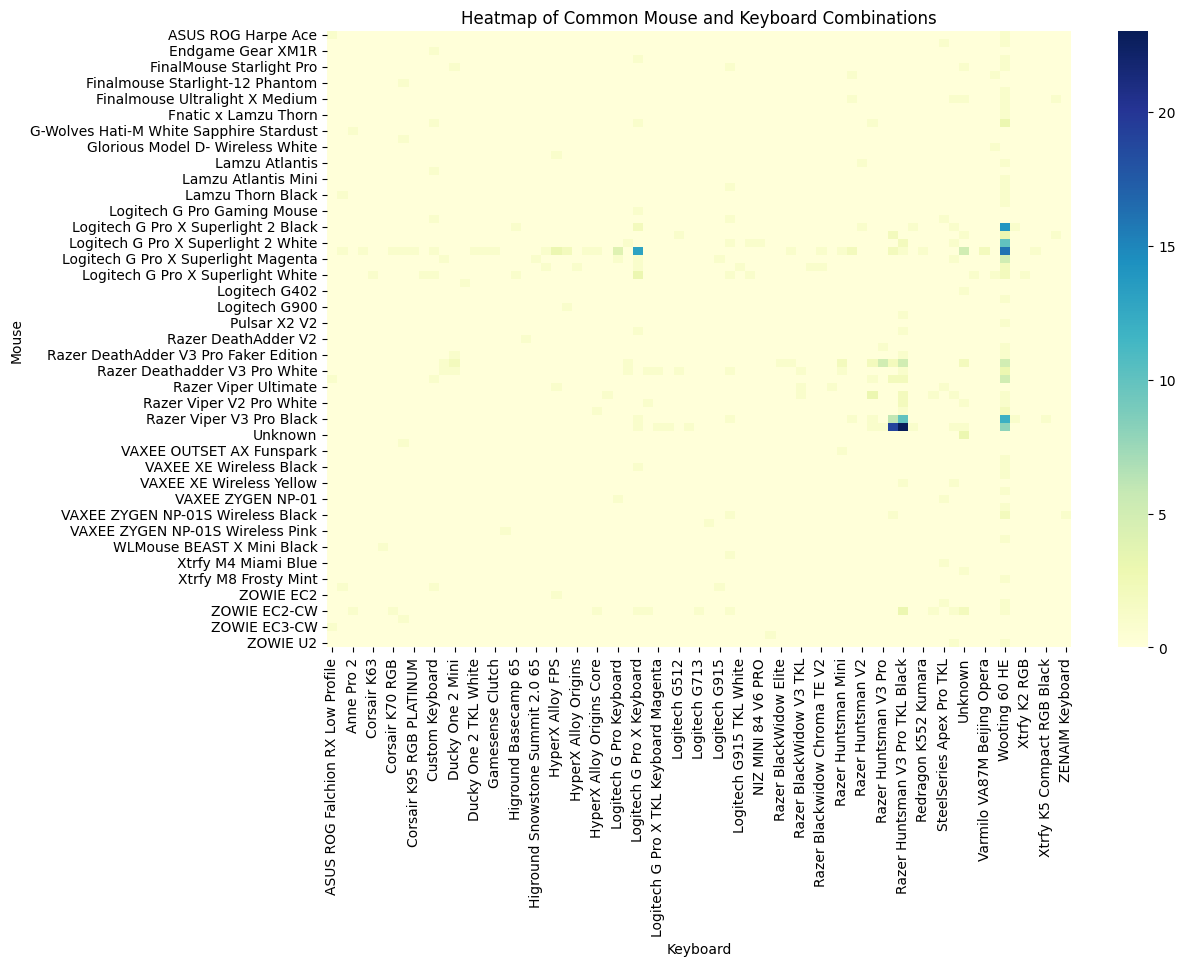

In [7]:

# Heatmap of Common Mouse and Keyboard Combinations
plt.figure(figsize=(12, 8))
mouse_keyboard_heatmap = pd.crosstab(df['Mouse'], df['Keyboard'])
sns.heatmap(mouse_keyboard_heatmap, cmap='YlGnBu')
plt.title('Heatmap of Common Mouse and Keyboard Combinations')
plt.xlabel('Keyboard')
plt.ylabel('Mouse')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



### 2.6 Boxplot of DPI by Team

We use a boxplot to compare the DPI settings across different teams.


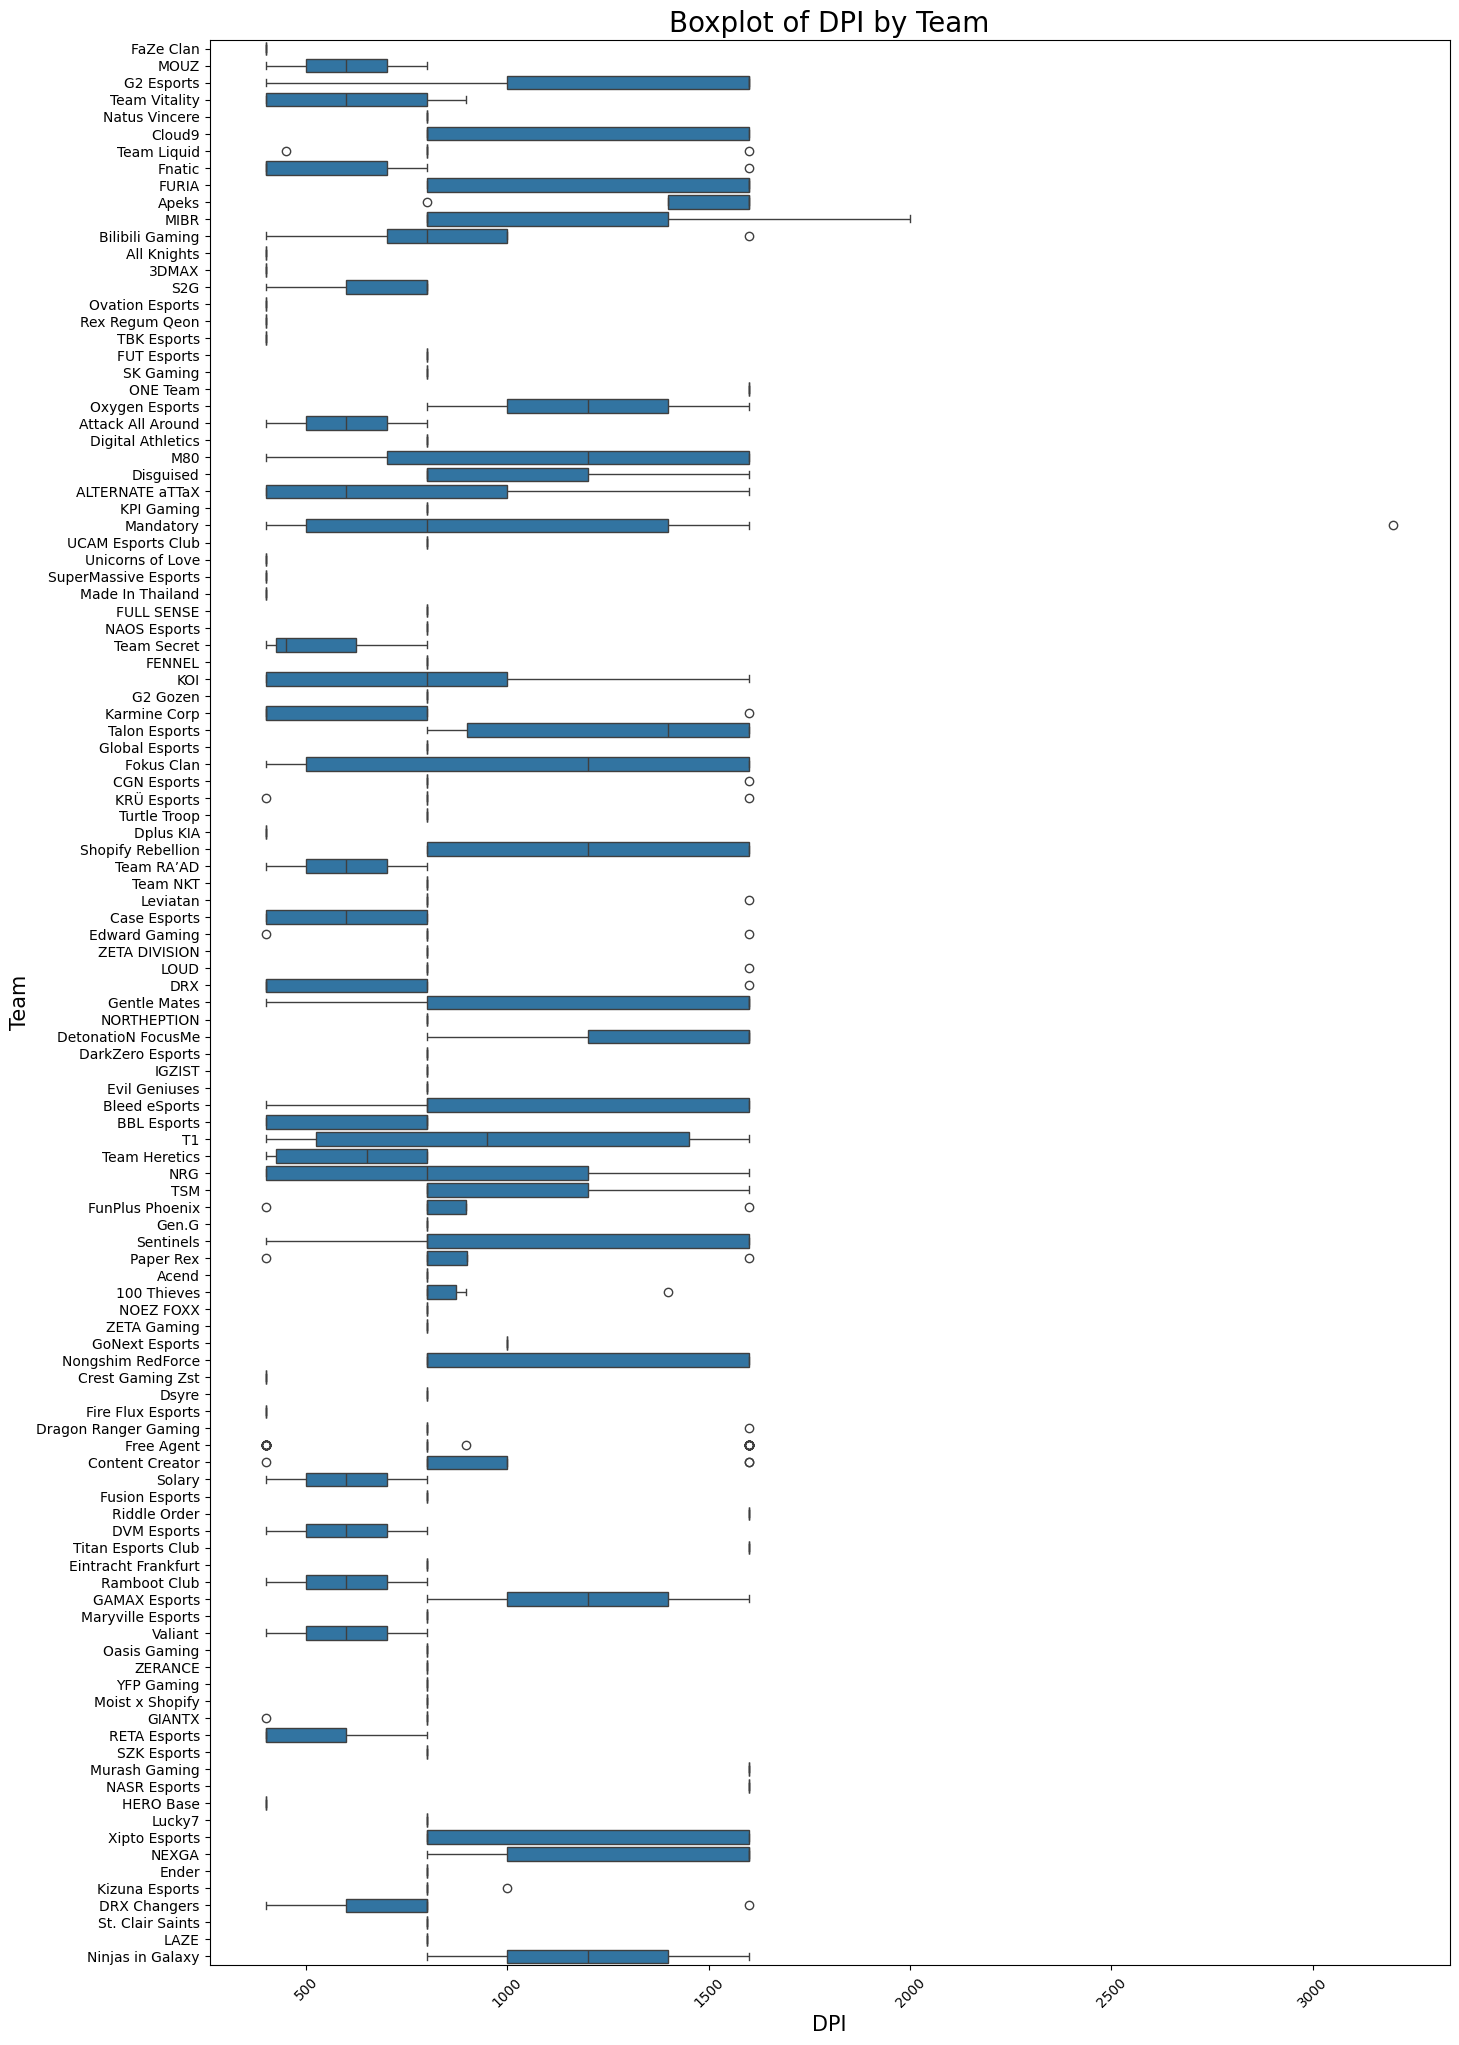

In [11]:

# Boxplot of DPI by Team


# Increase figure size for better readability
plt.figure(figsize=(16, 25))

# Create the boxplot
sns.boxplot(x='DPI', y='Team', data=df)

# Set plot title and labels
plt.title('Boxplot of DPI by Team', fontsize=20)
plt.xlabel('DPI', fontsize=15)
plt.ylabel('Team', fontsize=15)

# Rotate the team names to make them readable
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

# Show the plot
plt.show()



### 2.7 Count Plot of Monitors Used

We create a count plot to show the distribution of different monitors used by the players.


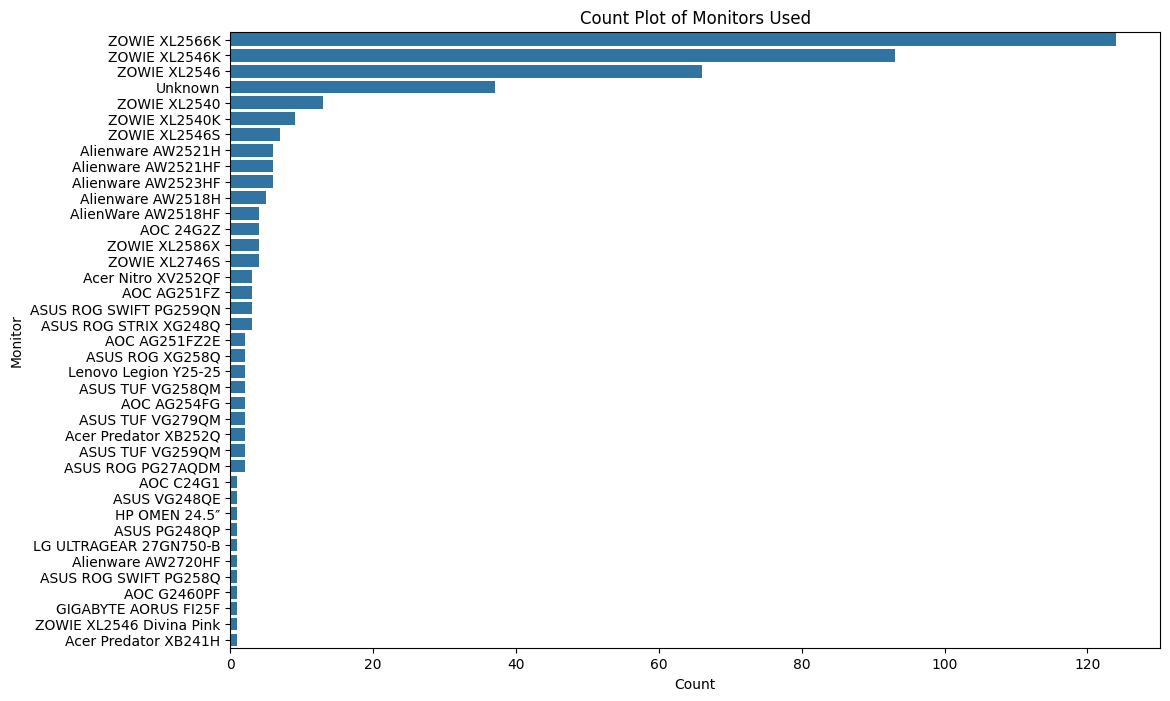

In [12]:

# Count Plot of Monitors Used
plt.figure(figsize=(12, 8))
sns.countplot(y='Monitor', data=df, order=df['Monitor'].value_counts().index)
plt.title('Count Plot of Monitors Used')
plt.xlabel('Count')
plt.ylabel('Monitor')
plt.show()
